In [1]:
import xarray as xr
#import scipy.interpolate as sci
#from resize import Resize
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from PIL import Image
import os
from dataloader_1 import *
import io

In [2]:
ds_hr = xr.open_dataset(r"C:\Users\vvagh\OneDrive - Indian Institute of Science Education and Research Bhopal\Documents\IISERB docs\workshoop assignments\other imp stuff\hr_0.1_GT.nc4")
#ds.attrs['crs']='EPSG:4326'
ds_hr
#lon=x, lat=y
#so the precipitaion is represented as (time,x,y)

<xarray.Dataset> Size: 95MB
Dimensions:        (time: 3720, lon: 80, lat: 80)
Coordinates:
  * lat            (lat) float64 640B 24.05 24.15 24.25 ... 31.75 31.85 31.95
  * lon            (lon) float32 320B 72.05 72.15 72.25 ... 79.75 79.85 79.95
  * time           (time) datetime64[ns] 30kB 2013-01-01 ... 2023-03-09
Data variables:
    precipitation  (time, lon, lat) float32 95MB ...
Attributes:
    BeginDate:       2013-01-01
    BeginTime:       00:00:00.000Z
    EndDate:         2013-01-01
    EndTime:         23:59:59.999Z
    FileHeader:      StartGranuleDateTime=2013-01-01T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR.MS.MRG.3IMERG.20130101-S000000-E002959.0000.V07B....
    title:           GPM IMERG Final Precipitation L3 1 day 0.1 degree x 0.1 ...
    DOI:             10.5067/GPM/IMERGDF/DAY/07
    ProductionTime:  2024-01-10T16:57:09.624Z
    history:         2024-05-28 11:01:35 GMT Hyrax-1.16.3 https://gpm1.gesdis...

In [3]:
(80-72)//0.1

79.0

In [4]:
(37-29)//0.1

79.0

ds2=xr.open_dataset(r'F:\TANISHQ\lr_0.25.nc')
ds2

print(len(ds2['lat'].values))
print(len(ds2['lon'].values))
print(len(ds_hr['lat'].values))
print(len(ds_hr['lon'].values))

In [5]:
from preporcessing import  interpolate
inetr=interpolate()
# inter_data=inetr.interpolate_data(r'F:\TANISHQ\lr_0.25.nc',0.25,0.1)

In [6]:
# inter_data.shape

In [7]:
# inetr.show_data_with_boundary(inter_data)

In [8]:
# inetr.show_data_with_boundary(ds2['precipitation'].values)

Raw data shape: (3720, 80, 80)
Raw data range: [0.0, 479.69500732421875]
Raw data mean: 2.0655155181884766
Raw data std: 7.690197944641113


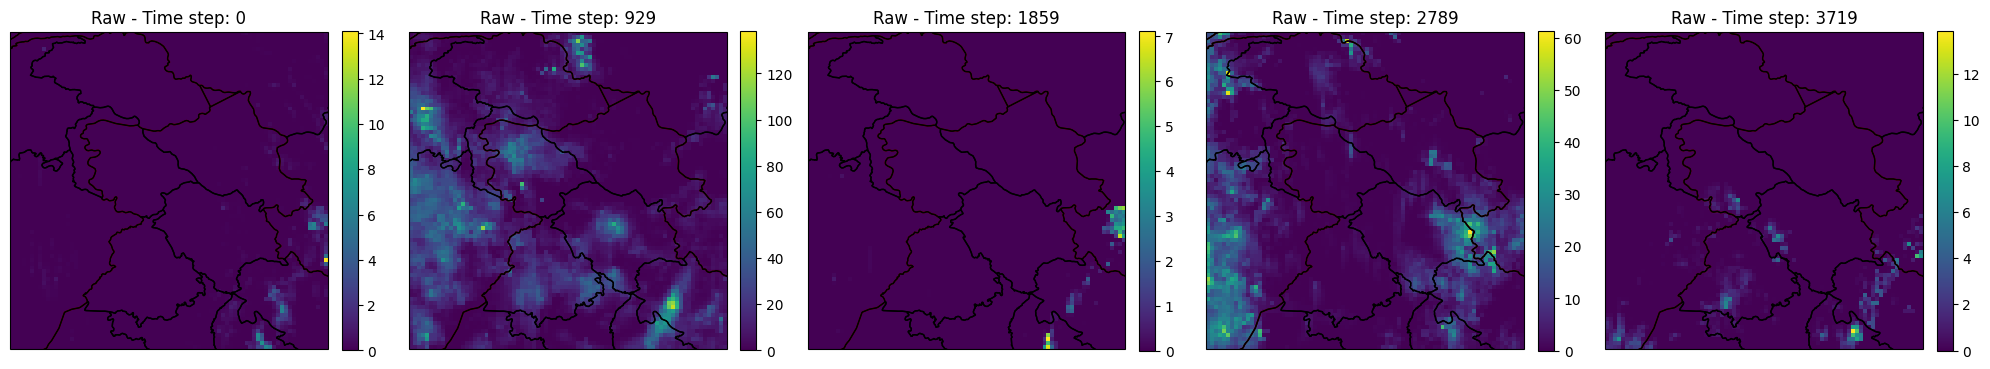

In [9]:
inetr.show_data_with_boundary(ds_hr['precipitation'].values)

In [10]:
#resampling both the lr and hr to 0.0625 gives the images of 128x128 dims
# new_data=inetr.resample(r'F:\TANISHQ\lr_0.25.nc',old_res=0.25,new_res=0.0625)
other_data=inetr.resample(r'hr_0.1_GT.nc4',old_res=0.1,new_res=0.0625)

Precipitation data shape: (3720, 80, 80)


In [11]:
#lr hr pair, but the probelm might arise when we try to upsale hte lr image to match the hr image for training purposes.
#hr_img=inetr.resample(r'F:\TANISHQ\hr_0.1_GT.nc4',old_res=0.25,new_res=0.125) #upssampling to 160x160. - interpolate_data would have been used here.
hr_img=inetr.resample(r'hr_0.1_GT.nc4',old_res=0.1,new_res=0.05) #upssampling to 160x160. - interpolate_data would have been used here.
lr_image=inetr.resample(r'hr_0.1_GT.nc4',old_res=0.1,new_res=0.25) #downsampling to 40x40 - pooling method would have been used here.(the map coords are preserved)

Precipitation data shape: (3720, 80, 80)


Raw data shape: (3720, 40, 40)
Raw data range: [0.0, 335.5662536621094]
Raw data mean: 2.065514326095581
Raw data std: 7.4724016189575195


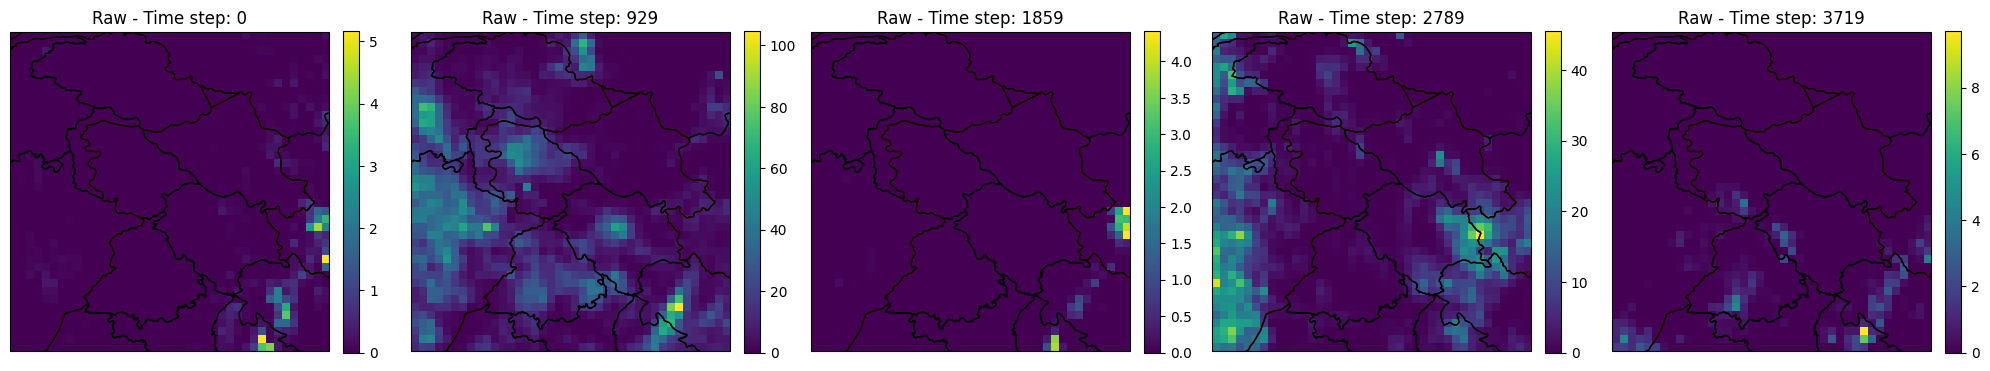

Raw data shape: (3720, 160, 160)
Raw data range: [0.0, 483.7738037109375]
Raw data mean: 2.068312883377075
Raw data std: 7.6451802253723145


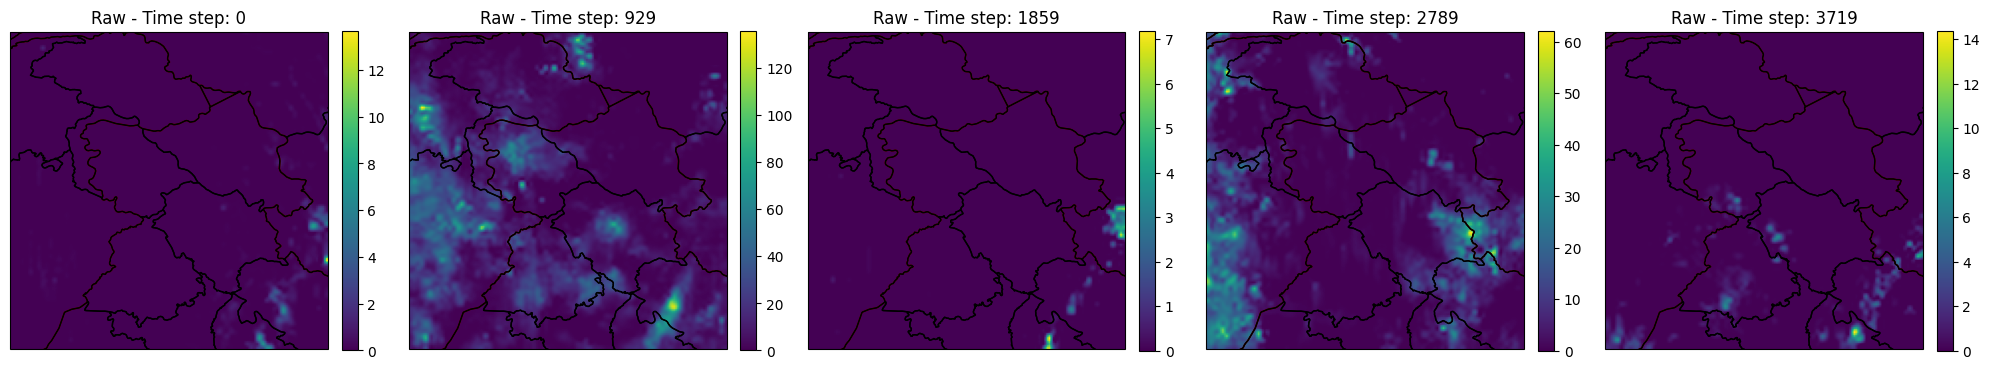

In [12]:
inetr.show_data_with_boundary(lr_image)
inetr.show_data_with_boundary(hr_img)

Raw data shape: (3720, 128, 128)
Raw data range: [0.0, 479.70318603515625]
Raw data mean: 2.068852186203003
Raw data std: 7.646714687347412


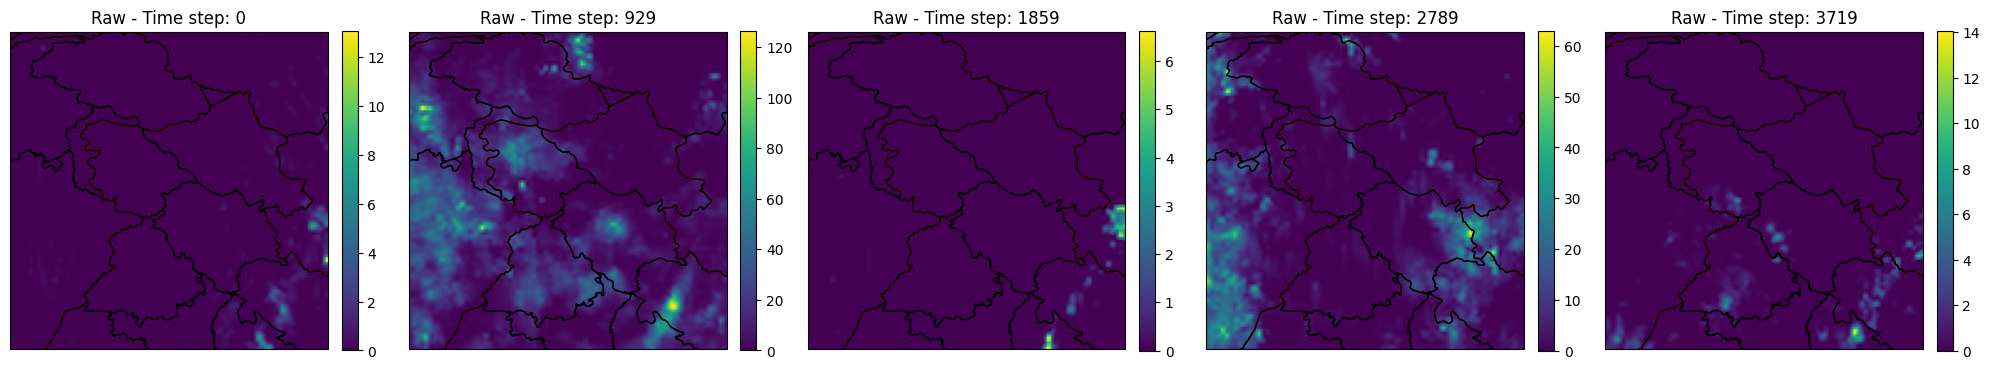

In [13]:
# inetr.show_data_with_boundary(new_data)
inetr.show_data_with_boundary(other_data)

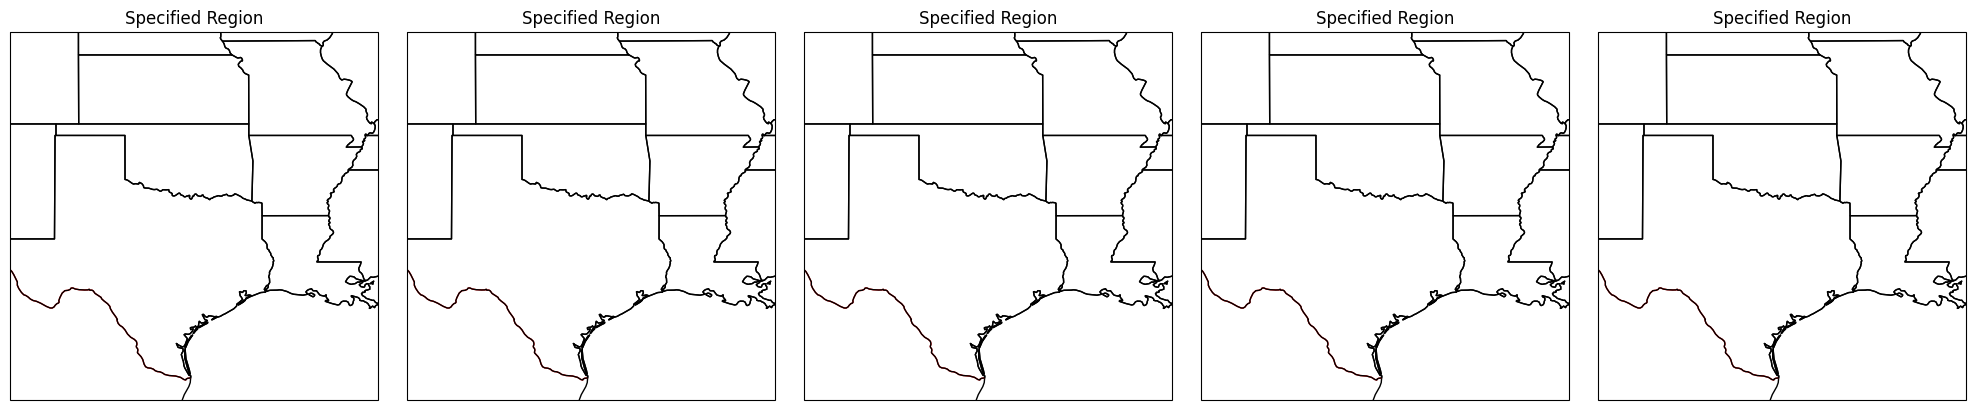

In [42]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

def show_region(minx=105, miny=25, maxx=75, maxy=40, num_samples=5):

    fig, axes = plt.subplots(1, num_samples, figsize=(20, 4), subplot_kw={'projection': ccrs.PlateCarree()})
    
    if num_samples == 1:
        axes = [axes]

    for ax in axes:
        # Set the extent to the specified region
        ax.set_extent([minx, maxx, miny, maxy], crs=ccrs.PlateCarree())
        ax.coastlines()
        ax.add_feature(cfeature.BORDERS, linestyle='-', edgecolor='red')
        ax.add_feature(cfeature.STATES, linestyle='-', edgecolor='black')  # Add state boundaries if needed
        ax.set_title('Specified Region')

    plt.tight_layout()
    plt.show()
show_region(minx=-105, miny=25, maxx=-89, maxy=41)

In [14]:
lr_img=inetr.make_image_from_data(other_data)
# hr_image=inetr.make_image_from_data(hr_img)
# img=inetr.make_image_from_data(other_data)

100%|██████████| 3720/3720 [00:00<00:00, 13969.67it/s]


(512, 512)


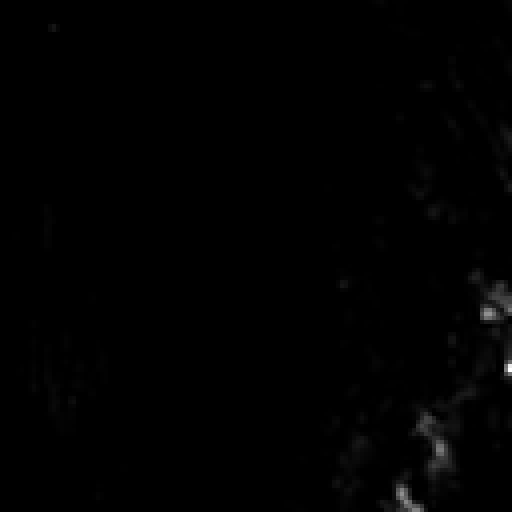

In [15]:
print(lr_img[0].resize((lr_img[0].width * 4, lr_img[0].height * 4), resample=Image.NEAREST).size)
lr_img[0].resize((lr_img[0].width * 4, lr_img[0].height * 4), resample=Image.NEAREST)

(128, 128)


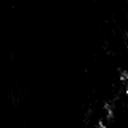

In [16]:
print(lr_img[0].size)
lr_img[0]

In [17]:
lr_img_resized = [x.resize((x.width * 4, x.height * 4), resample=Image.NEAREST) for x in lr_img]
lr_img

[<PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L size=128x128>,
 <PIL.Image.Image image mode=L siz

In [18]:
#saving the images 
lr_folder=r"img_imerge"
# hr_folder=r"F:\TANISHQ\hr_img_imerge"
if os.path.exists(lr_folder) and os.path.exists(lr_folder):
    print("FOLDERS ALREADY EXIST")
else:
    inetr.save_images(lr_img,r'img_imerge')
    # inetr.save_images(hr_image,r'F:\TANISHQ\hr_img_imerge')

FOLDERS ALREADY EXIST


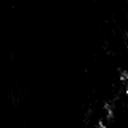

In [19]:
lr_img[0]

In [20]:
len(lr_img)

3720

In [21]:
# Calculate the mean value of all pixel intensities across all images
all_pixels = np.concatenate([np.array(img).flatten() for img in lr_img])
overall_mean = np.mean(all_pixels)

# Select images with mean pixel intensity above the overall mean
selected_images = [img for img in lr_img if np.mean(np.array(img)) > overall_mean]

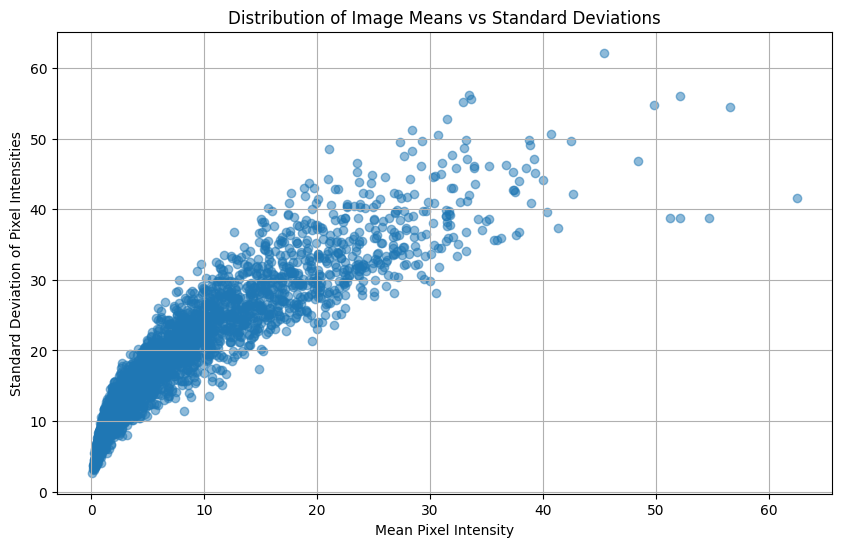

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate mean for each image
image_means = [np.mean(np.array(img)) for img in lr_img]
image_stds = [np.std(np.array(img)) for img in lr_img]

plt.figure(figsize=(10, 6))
plt.scatter(image_means, image_stds, alpha=0.5)
plt.title('Distribution of Image Means vs Standard Deviations')
plt.xlabel('Mean Pixel Intensity')
plt.ylabel('Standard Deviation of Pixel Intensities')
plt.grid(True)
plt.show()

Total images: 3720
Overall pixel mean: 7.000977546938004
Number of images above mean: 1296
Number of images below mean: 2424
Image means statistics:
Min image mean: 0.07958984375
Max image mean: 62.4635009765625
Median image mean: 3.388702392578125


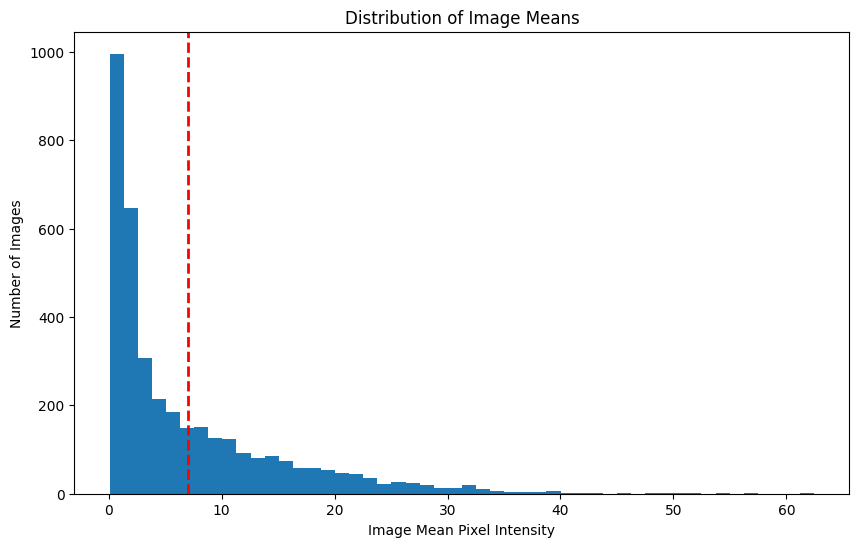

In [23]:
# Calculate the mean value of all pixel intensities across all images
all_pixels = np.concatenate([np.array(img).flatten() for img in lr_img])
overall_mean = np.mean(all_pixels)

# Calculate individual image means
image_means = [np.mean(np.array(img)) for img in lr_img]

# Detailed analysis
total_images = len(lr_img)
above_mean_images = [img for img in lr_img if np.mean(np.array(img)) > overall_mean]
below_mean_images = [img for img in lr_img if np.mean(np.array(img)) <= overall_mean]

print(f"Total images: {total_images}")
print(f"Overall pixel mean: {overall_mean}")
print(f"Number of images above mean: {len(above_mean_images)}")
print(f"Number of images below mean: {len(below_mean_images)}")

# Analyze the distribution of image means
print("Image means statistics:")
print(f"Min image mean: {min(image_means)}")
print(f"Max image mean: {max(image_means)}")
print(f"Median image mean: {np.median(image_means)}")

# Optionally, plot a histogram of image means
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(image_means, bins=50)
plt.title('Distribution of Image Means')
plt.xlabel('Image Mean Pixel Intensity')
plt.ylabel('Number of Images')
plt.axvline(overall_mean, color='r', linestyle='dashed', linewidth=2)
plt.show()

In [24]:
selected_images[0]
img=inetr.make_image_from_data(selected_images)

100%|██████████| 1296/1296 [00:00<00:00, 6479.98it/s]


In [25]:
selected_images[0].size

(128, 128)

In [26]:
len(selected_images)

1296

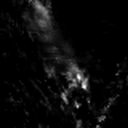

In [27]:
selected_images[0]

In [28]:
new_img=selected_images[:16]

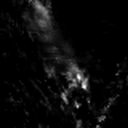

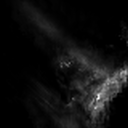

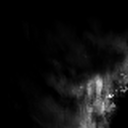

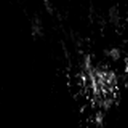

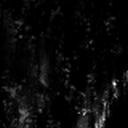

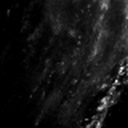

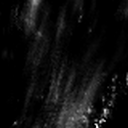

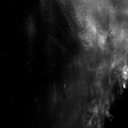

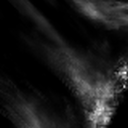

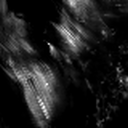

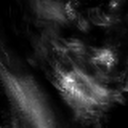

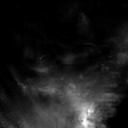

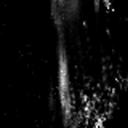

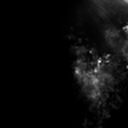

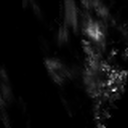

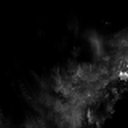

In [29]:
for img in new_img:
    display(img)
    # img.show()

In [30]:
import torch
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os

class SelectedImagesDataset(Dataset):
   def __init__(self, selected_images):
       self.images = [torch.from_numpy(np.array(img)).float().unsqueeze(0) for img in selected_images]
   
   def __len__(self):
       return len(self.images)
   
   def __getitem__(self, idx):
       return self.images[idx]

def make_dataloader(selected_images, batch_size=16):
   dataset = SelectedImagesDataset(selected_images)
   
   dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
   
   save_dir = os.getcwd()
   os.makedirs(save_dir, exist_ok=True)
   
   for i, image in enumerate(dataset):
       img_to_save = image.squeeze().numpy()
       
       import matplotlib.pyplot as plt
       plt.imsave(os.path.join(save_dir, f'selected_image_{i}.png'), img_to_save, cmap='gray')
   
   return dataloader

dataloader = make_dataloader(new_img, batch_size=16)

for batch in dataloader:
   print("Batch shape:", batch.shape)
   break

Batch shape: torch.Size([16, 1, 128, 128])


In [31]:
torch.save(dataloader, 'test_images_dataloader.pth')

#making the dataloader to perform leave on out cross validation
if __name__ == "__main__":
    # Example with directories
    #lr_input = images
    #hr_input = interpolated_images
    save_path = r"F:\TANISHQ\ML-hands-on\course_work\crown\data\fold_data"
    batch_size = 64
    tts_ratio = 0.85
    process_images(lr_img, hr_image, save_path, batch_size=batch_size, k_fold=True,loov=False, k=4, tts_ratio=tts_ratio)


#making the loov datasets
if __name__ == "__main__":
    # Example with directories
    #lr_input = images
    #hr_input = interpolated_images
    save_path = r"F:\TANISHQ\loov"
    batch_size = 64
    tts_ratio = 0.85
    process_images(r'F:\TANISHQ\lr_img_imerge', r'F:\TANISHQ\hr_img_imerge', save_path, batch_size=batch_size)


#making the dataloaders.
if __name__ == "__main__":
    # Example with directories
    #lr_input = images
    #hr_input = interpolated_images
    save_path = r"F:\TANISHQ\ML-hands-on\course_work\crown\data"
    batch_size = 64
    tts_ratio = 0.9

    train_loader, test_loader = process_images(lr_img, hr_image, save_path, batch_size=batch_size, tts_ratio=tts_ratio)


In [ ]:
inetr.save_xarray(hr_img,r'F:\TANISHQ\hr_0.1_GT.nc4',r'dataloader_hr.nc',0.049376,0.1)
inetr.save_xarray(lr_image,r'F:\TANISHQ\hr_0.1_GT.nc4',r'dataloader_lr.nc',0.197,0.1)

In [ ]:
#
#train=torch.load(r"F:\TANISHQ\ML-hands-on\course_work\crown\data\data_test.pth")

ds_new=xr.open_dataset(r'F:\TANISHQ\ML-hands-on\course_work\crown\processing\dataloader_hr.nc')
ds_new

In [ ]:
ds_lr=xr.open_dataset(r'F:\TANISHQ\ML-hands-on\course_work\crown\processing\dataloader_lr.nc')
ds_lr

In [ ]:
fold=torch.load(r'F:\TANISHQ\ML-hands-on\course_work\crown\data\fold_data\fold_2.pth')

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt

def visualize_dataloader(filepath, num_images=5):
    """
    Visualizes images and their corresponding targets from a .pth file containing a DataLoader.
    
    Args:
        filepath (str): Path to the .pth file.
        num_images (int): Number of images to display.
    """
    try:
        # Load the DataLoader
        dataloader = torch.load(filepath)
        
        if dataloader is None:
            raise ValueError(f"Data loaded from {filepath} is missing required dataloader.")

        # Initialize figure
        fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 5))
        if num_images == 1:
            axes = [axes]  # Ensure axes is iterable
        elif num_images > 1:
            axes = axes.reshape(num_images, 2)  # Reshape to match (num_images, 2) layout

        images_shown = 0
        
        # Iterate through batches of images
        for batch in dataloader:
            if images_shown >= num_images:
                break
            
            # Assume the batch contains images and targets, e.g., (images, targets)
            images, targets = batch  # Unpack the batch
            
            # Handle already batched images
            if images.ndim == 5:  # Batched images (N, B, C, H, W)
                images = images.reshape(-1, *images.shape[2:])
            if targets.ndim == 5:  # Batched targets (N, B, C, H, W)
                targets = targets.reshape(-1, *targets.shape[2:])
            
            for i in range(min(num_images - images_shown, len(images))):
                image_tensor = images[i]
                target_tensor = targets[i]

                # Convert image tensor to NumPy array
                image_np = image_tensor.numpy()
                if image_np.ndim == 3 and image_np.shape[0] == 1:  # Grayscale image
                    image_np = image_np.squeeze(0)  # Remove the channel dimension
                elif image_np.ndim == 3 and image_np.shape[0] == 3:  # RGB image
                    image_np = np.transpose(image_np, (1, 2, 0))  # Convert from CxHxW to HxWxC

                # Convert target tensor to NumPy array
                target_np = target_tensor.numpy()
                if target_np.ndim == 3 and target_np.shape[0] == 1:  # Grayscale target
                    target_np = target_np.squeeze(0)  # Remove the channel dimension
                elif target_np.ndim == 3 and target_np.shape[0] == 3:  # RGB target
                    target_np = np.transpose(target_np, (1, 2, 0))  # Convert from CxHxW to HxWxC

                # Normalize images if necessary (optional, depending on how data is stored)
                if image_np.max() > 1:
                    image_np = (image_np * 255).astype(np.uint8)
                if target_np.max() > 1:
                    target_np = (target_np * 255).astype(np.uint8)

                # Display the image and target using matplotlib
                axes[images_shown, 0].imshow(image_np, cmap='gray' if image_np.ndim == 2 else None)
                axes[images_shown, 0].axis('off')  # Hide axes
                axes[images_shown, 0].set_title('Image')

                axes[images_shown, 1].imshow(target_np, cmap='gray' if target_np.ndim == 2 else None)
                axes[images_shown, 1].axis('off')  # Hide axes
                axes[images_shown, 1].set_title('Target')
                
                images_shown += 1

        plt.show()
    
    except Exception as e:
        print(f"An error occurred while visualizing dataloader data: {e}")

# Example usage
visualize_dataloader(r'F:\TANISHQ\ML-hands-on\course_work\crown\data\data_test.pth', num_images=5)

In [ ]:
def visualize_fold_data(filepath, num_images=5):
    try:
        # Load the fold data
        fold_data = torch.load(filepath)
        
        if fold_data is None:
            raise ValueError(f"Data loaded from {filepath} is missing required fold data.")

        train_dataloader = DataLoader(fold_data['train_dataset'], batch_size=num_images, shuffle=False)
        test_dataloader = DataLoader(fold_data['test_dataset'], batch_size=num_images, shuffle=False)

        def display_images(dataloader, title):
            images_shown = 0
            for batch in dataloader:
                images, targets = batch
                fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 5))
                if num_images == 1:
                    axes = [axes]
                elif num_images > 1:
                    axes = axes.reshape(num_images, 2)
                
                for i in range(min(num_images, len(images))):
                    image_tensor = images[i]
                    target_tensor = targets[i]

                    image_np = image_tensor.numpy()
                    if image_np.ndim == 3 and image_np.shape[0] == 1:
                        image_np = image_np.squeeze(0)
                    elif image_np.ndim == 3 and image_np.shape[0] == 3:
                        image_np = np.transpose(image_np, (1, 2, 0))

                    target_np = target_tensor.numpy()
                    if target_np.ndim == 3 and target_np.shape[0] == 1:
                        target_np = target_np.squeeze(0)
                    elif target_np.ndim == 3 and target_np.shape[0] == 3:
                        target_np = np.transpose(target_np, (1, 2, 0))

                    if image_np.max() > 1:
                        image_np = (image_np * 255).astype(np.uint8)
                    if target_np.max() > 1:
                        target_np = (target_np * 255).astype(np.uint8)

                    axes[i, 0].imshow(image_np, cmap='gray' if image_np.ndim == 2 else None)
                    axes[i, 0].axis('off')
                    axes[i, 0].set_title('Image')

                    axes[i, 1].imshow(target_np, cmap='gray' if target_np.ndim == 2 else None)
                    axes[i, 1].axis('off')
                    axes[i, 1].set_title('Target')

                plt.suptitle(title)
                plt.show()
                images_shown += len(images)
                if images_shown >= num_images:
                    break

        display_images(train_dataloader, 'Training Data')
        display_images(test_dataloader, 'Testing Data')

    except Exception as e:
        print(f"An error occurred while visualizing fold data: {e}")


In [ ]:
visualize_fold_data(r'F:\TANISHQ\ML-hands-on\course_work\crown\data\fold_data\fold_2.pth', num_images=5)

In [ ]:
visualize_fold_data(r'F:\TANISHQ\loov\loov_369.pth', num_images=5)

In [ ]:
for fold in os.listdir(r'F:\TANISHQ\ML-hands-on\course_work\crown\data\fold_data'):
    file=r'F:\TANISHQ\ML-hands-on\course_work\crown\data\fold_data'+'\\'+fold
    train,test=load_fold_data(file)
    ##trainin loop as usual 


    ##testing on the test data

    ##printing the results for the particualr fold(averaged over the entire fold)

##printing the results for the entire dataset(averaged over all the folds)